# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

C:\Users\HP\anaconda3\Lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: c:\Users\HP\Desktop\Bootcamp\Week 4\weekly_project\Bus_Breakdown_and_Delays.csv

  0%|          | 0.00/34.4M [00:00<?, ?B/s]
  2%|▏         | 524k/34.4M [00:00<00:18, 1.84MB/s]
  5%|▍         | 1.57M/34.4M [00:00<00:07, 4.38MB/s]
 11%|█         | 3.67M/34.4M [00:00<00:03, 8.52MB/s]
 23%|██▎       | 7.86M/34.4M [00:00<00:01, 17.3MB/s]
 29%|██▉       | 9.96M/34.4M [00:00<00:02, 11.0MB/s]
 35%|███▌      | 12.1M/34.4M [00:01<00:01, 12.0MB/s]
 40%|███▉      | 13.6M/34.4M [00:01<00:01, 12.3MB/s]
 46%|████▌     | 15.7M/34.4M [00:01<00:01, 13.9MB/s]
 56%|█████▋    | 19.4M/34.4M [00:01<00:00, 18.2MB/s]
 62%|██████▏   | 21.5M/34.4M [00:01<00:00, 18.4MB/s]
 69%|██████▊   | 23.6M/34.4M [00:01

## Importing Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [3]:
df = pd.read_csv('Bus_Breakdown_and_Delays.csv')

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,"G.V.C., LTD.",25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,"G.V.C., LTD.",15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,"G.V.C., LTD.",10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [6]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [7]:
df.isnull().sum()

School_Year                             0
Busbreakdown_ID                         0
Run_Type                               89
Bus_No                                  0
Route_Number                           88
Reason                                102
Schools_Serviced                        0
Occurred_On                             0
Created_On                              0
Boro                                 6318
Bus_Company_Name                        0
How_Long_Delayed                    21630
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    142340
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64

In [8]:
# most data in the Incident_Number column is missing, so we can drop it
df.drop('Incident_Number', axis=1, inplace=True)

In [9]:
# replace the missing values in Run_type and with the most frequent value
df['Run_Type'].fillna(df['Run_Type'].mode()[0], inplace=True)
df['Reason'].fillna(df['Reason'].mode()[0], inplace=True)

In [10]:
# replace the missing values in Route_Number and How_Long_Delayed with 'Unknown'
df['Route_Number'].fillna('Unknown', inplace=True)
df['How_Long_Delayed'].fillna('Unknown', inplace=True)

In [11]:
df.dropna(subset='Boro',inplace=True)

In [12]:
df.isnull().sum()   # no missing values

School_Year                        0
Busbreakdown_ID                    0
Run_Type                           0
Bus_No                             0
Route_Number                       0
Reason                             0
Schools_Serviced                   0
Occurred_On                        0
Created_On                         0
Boro                               0
Bus_Company_Name                   0
How_Long_Delayed                   0
Number_Of_Students_On_The_Bus      0
Has_Contractor_Notified_Schools    0
Has_Contractor_Notified_Parents    0
Have_You_Alerted_OPT               0
Informed_On                        0
Last_Updated_On                    0
Breakdown_or_Running_Late          0
School_Age_or_PreK                 0
dtype: int64

In [13]:
df.shape

(141654, 20)

In [99]:
df.duplicated().sum()

0

In [14]:
# # distribution of numeric features
# sns.histplot(df['Number_Of_Students_On_The_Bus'], kde=True)
# plt.show()

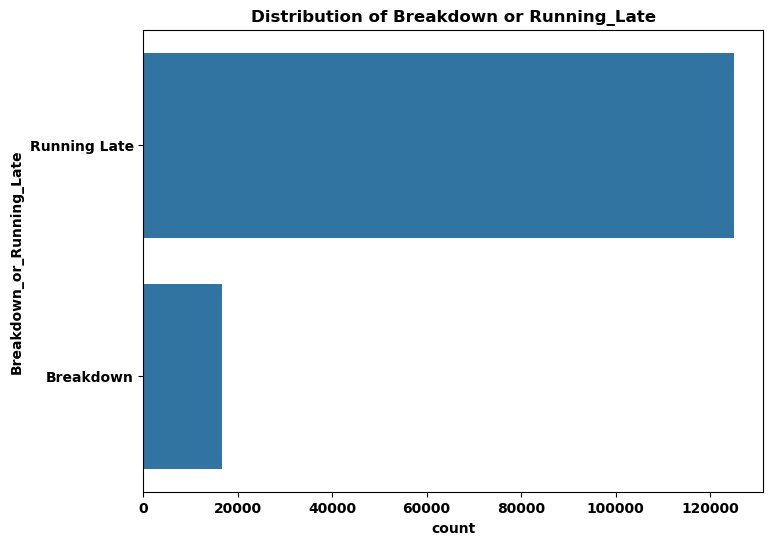

In [15]:
# Categorical feature analysis
plt.figure(figsize=(8, 6))
sns.countplot(df['Breakdown_or_Running_Late'])
plt.title('Distribution of Breakdown or Running_Late')
plt.show() #imbalanced class distribution

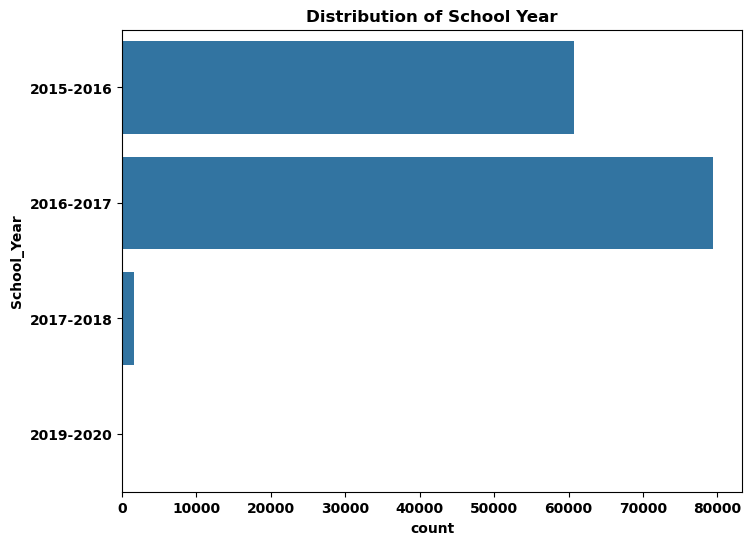

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(df['School_Year'])
plt.title('Distribution of School Year')
plt.show() 

In [17]:
#Correlation matrix
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
correlation_matrix

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
Busbreakdown_ID,1.000000,-0.017205
Number_Of_Students_On_The_Bus,-0.017205,1.000000


In [18]:
df.drop('Busbreakdown_ID', axis=1, inplace=True)

<Axes: >

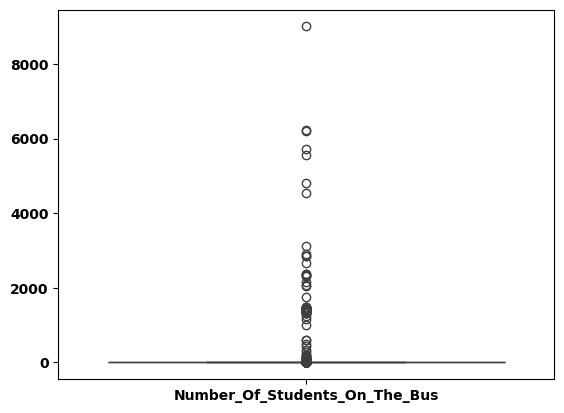

In [19]:
sns.boxplot(df)

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141654 entries, 0 to 147971
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      141654 non-null  object
 1   Run_Type                         141654 non-null  object
 2   Bus_No                           141654 non-null  object
 3   Route_Number                     141654 non-null  object
 4   Reason                           141654 non-null  object
 5   Schools_Serviced                 141654 non-null  object
 6   Occurred_On                      141654 non-null  object
 7   Created_On                       141654 non-null  object
 8   Boro                             141654 non-null  object
 9   Bus_Company_Name                 141654 non-null  object
 10  How_Long_Delayed                 141654 non-null  object
 11  Number_Of_Students_On_The_Bus    141654 non-null  int64 
 12  Has_Contractor_Notifi

In [22]:
# feature engineering
df['How_Long_Delayed'] = df['How_Long_Delayed'].apply(lambda x: 'More than 15 minutes' if x == 'More than 15 minutes' else 'Less than 15 minutes')

In [24]:
#Encoding categorical variables
encoder = LabelEncoder()
df[['School_Year','Run_Type','Bus_No','Route_Number','Reason','Schools_Serviced','Boro','Bus_Company_Name','How_Long_Delayed','Has_Contractor_Notified_Schools','Has_Contractor_Notified_Parents','Have_You_Alerted_OPT','Breakdown_or_Running_Late','School_Age_or_PreK']] = df[['School_Year','Run_Type','Bus_No','Route_Number','Reason','Schools_Serviced','Boro','Bus_Company_Name','How_Long_Delayed','Has_Contractor_Notified_Schools','Has_Contractor_Notified_Parents','Have_You_Alerted_OPT','Breakdown_or_Running_Late','School_Age_or_PreK']].apply(lambda x: encoder.fit_transform(x))

In [25]:
df.drop(['Occurred_On','Created_On','Informed_On','Last_Updated_On'], axis=1, inplace=True)

In [26]:
# Scaling 
scaler = StandardScaler()

df[['Number_Of_Students_On_The_Bus']] = scaler.fit_transform(df[['Number_Of_Students_On_The_Bus']])

In [27]:
# Handling imbalanced class distribution
X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

smote = SMOTE(sampling_strategy='minority', k_neighbors=1)
X_sm, y_sm = smote.fit_resample(X, y)

In [29]:
df = pd.concat([X_sm, y_sm], axis=1)
df

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,School_Age_or_PreK,Breakdown_or_Running_Late
0,0,3,7414,77,6,4988,1,27,0,0.024857,1,1,0,0,1
1,0,3,8042,77,3,5056,1,27,0,-0.011120,1,1,0,0,1
2,0,3,4619,209,3,4954,1,27,0,0.150779,1,1,1,0,1
3,0,3,4507,209,6,4953,1,27,0,0.132790,1,1,1,0,1
4,0,3,4514,209,6,5134,1,27,0,0.150779,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250123,0,9,9624,1181,6,3142,2,57,0,-0.065087,1,1,0,1,0
250124,0,7,3127,1220,2,2971,2,30,0,0.023391,0,1,0,1,0
250125,0,7,3623,3549,5,3241,3,70,0,-0.012644,1,1,1,1,0
250126,0,7,7958,4479,2,670,4,39,0,-0.065087,1,1,1,1,0


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [30]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200102, 14), (50026, 14), (200102,), (50026,))

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [33]:
model = Sequential()

# input layer
model.add(Dense(units=14, input_dim=X_train.shape[1], kernel_initializer='uniform',activation='relu'))

# hidden layers
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))

# output layer
model.add(Dense(units=1, activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 14)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 349 (1.36 KB)

 Trainable params: 349 (1.36 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [ ]:
#optimizer = Adam(learning_rate=0.01)

In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [38]:
early_stopping = EarlyStopping(patience=10, monitor='val_loss' ,restore_best_weights=True)

In [39]:
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6193 - loss: 0.6374 - val_accuracy: 0.6273 - val_loss: 0.6328
Epoch 2/50
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6286 - loss: 0.6308 - val_accuracy: 0.6218 - val_loss: 0.6344
Epoch 3/50
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6316 - loss: 0.6305 - val_accuracy: 0.6418 - val_loss: 0.6265
Epoch 4/50
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6405 - loss: 0.6267 - val_accuracy: 0.6462 - val_loss: 0.6237
Epoch 5/50
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6399 - loss: 0.6265 - val_accuracy: 0.6338 - val_loss: 0.6285
Epoch 6/50
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6346 - loss: 0.6292 - val_accuracy: 0.6549 - val_loss: 0.6204
Epoch 7/50
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6417 - loss: 0.6262 - val_accuracy: 0.6352 - val_loss: 0.6291
Epoch 8/50
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6481 - loss: 0.6224 -

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [40]:
# Evaluate the model
model.evaluate(X_test, y_test)

1564/1564 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7297 - loss: 0.5475


[0.5488643050193787, 0.7293007373809814]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [46]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Reset the index of the 'y_test' Series
y_test_reset = y_test.reset_index(drop=True)

# Choose 5 random sample to use them for prediction 
random_sample_indices = random.sample(range(len(X_test)), 5)

for sample_index in random_sample_indices:
    actual_class = y_test_reset[sample_index]
    predicted_class = predicted_classes[sample_index]

    print(f"Sample Index: {sample_index}")
    print(f"Actual Class: {actual_class}")
    print(f"Predicted Class: {predicted_class}")
    print()

1564/1564 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
Sample Index: 46020
Actual Class: 0
Predicted Class: 0

Sample Index: 41320
Actual Class: 1
Predicted Class: 0

Sample Index: 27270
Actual Class: 1
Predicted Class: 0

Sample Index: 40013
Actual Class: 1
Predicted Class: 0

Sample Index: 14633
Actual Class: 0
Predicted Class: 0



## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

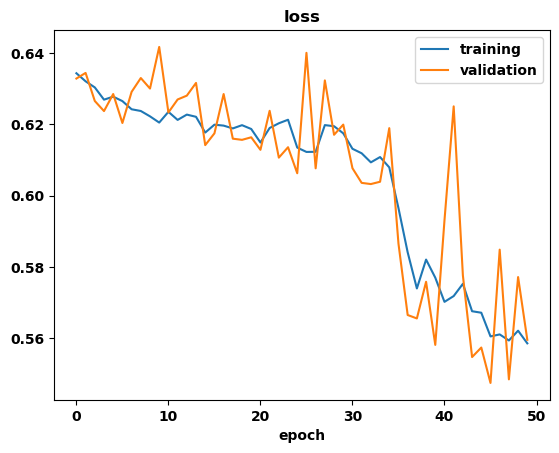

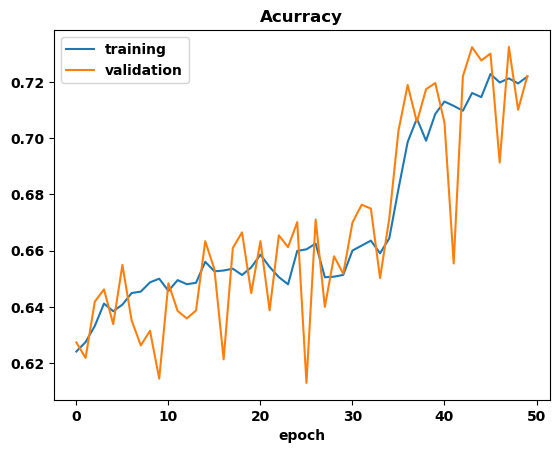

In [47]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()

## Save the Model
Save the trained model for submission.

In [48]:
model.save("Bus_Breakdown_and_Delays_model.h5")

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

- Data preprocessing: Standard preprocessing steps to clean data for correct prediction with the addition of using SMOTE to oversample the minority class.
- Model architecture: Simple ANN model with Input layer containing 14 units matching the input features and activation='relu', 2 hidden layers containing 6 neurons with activation='relu' and output layer with one neuron since it's binary classification problem and activation='sigmoid'.
- Training process: choosing a small batch size means it's going to take longer training so i went with batch_size=64, i choose 50 epochs but used early stopping parameter to prevent the model from overfitting.
- Loss function: I used binary_crossentropy because it's classification problem with two classes Breakdown or Running late.
- Regularization:  I did not use drop out , but it's a consideration to do as a second experiment.
- Result: The ANN model achieved 0.7194 accuracy on training and 0.7297 on testing. In addition, I printed a sample and as it can be seen the model wrongly classified data in index 41320, 27270 and 40013 while correctly classified data in index 46020 and 14633. 
- Overall, the model is not perfect and needs further improvements.